<a href="https://colab.research.google.com/github/sinaabbasi1/machine-learning-and-deep-learning/blob/main/Assignments/Assignment%2002/ML_Assignment_02_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns


##import whatever you need


#Problem1(Logistic Regression)

In this problem, we will use logistic regression to separate points inside a circle from the outside ones. the code below uses the random functions of the NumPy library to uniformly generate data inside a square A*A centered at (x1_0, x2_0). Points that lie inside the circle (x1_0,x2_0,R) get labeled 1 and vice versa.

(20000,)

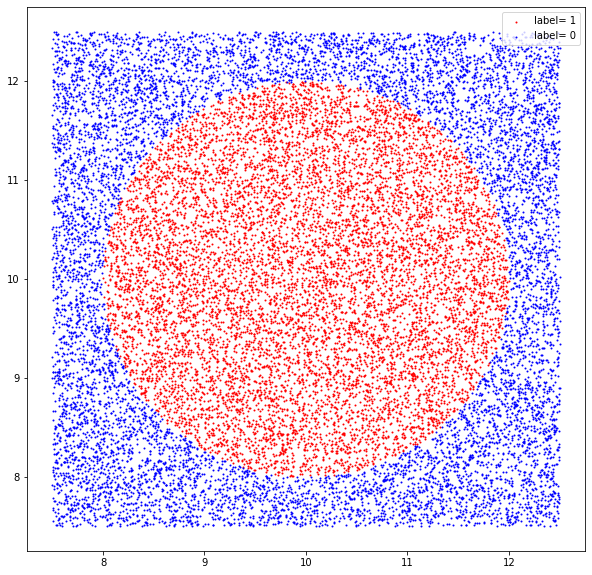

In [ ]:

x1_0 = 10
x2_0 = 10
A = 5
N = 20000
R = 2

# x1.shape = (20000,)  ,  label.shape = (20000,)
x1 = A *np.random.rand(N) + x1_0 - A/2 # random [0,1] -> [0, 5] -> [10, 15] -> [7.5, 12.5]
x2 = A *np.random.rand(N) + x2_0 - A/2
rr = np.square(x1-x1_0) + np.square(x2-x2_0) # [-2.5, 2.5] -> [0, 6.25]
label = rr<= R**2

plt.figure(figsize = (10,10))
plt.scatter(x1[label==1], x2[label==1], c='r', s=1, label="label= 1")
plt.scatter(x1[label==0], x2[label==0], c='b', s=1, label="label= 0")
plt.legend()

label.shape


Now we use Logistic regression to do so. [SciKit-learn](https://scikit-learn.org/stable/) have some amazing function to help you (Highly recommend using this library).



##Step 1
in this step, use x1 and x2 as input features.

You should do:

2. Split the data into the test set and train set (with ratio = 0.5).

1. Create a logistic regression model (without penalty).

2. Feed the training points into your model and train it.

3. Using your trained model, predict labels of the test set.

4. Plot the data such that their color represents their predicted label (like the previous image).

In [ ]:
## create model and predict labels

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# reshape the features in order to concatenate them for splitting
x1_reshaped = x1.reshape((20000,1))
x2_reshaped = x2.reshape((20000,1))

X = np.concatenate((x1_reshaped, x2_reshaped), axis=1) # X.shape = (20000, 2)
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

lr_model = LogisticRegression(penalty='none')
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Prediction on test set:", y_pred)

print("Accuracy on test set:", lr_model.score(X_test, y_test))


Prediction on test set: [ True  True  True ...  True False  True]
Accuracy on test set: 0.5347


In [ ]:
y_train.shape

(10000,)

Coefficents of our logistic regression:

In [ ]:
weights = lr_model.coef_
weights

array([[-0.00452425,  0.02538809]])

In [ ]:
w1 = weights[0][0]
w2 = weights[0][1]

In [ ]:
m = -(w1 / w2) #slope of our decision boundary
m

0.17820381941045366

Bias of our logistic regression:

In [ ]:
-(lr_model.intercept_[0] / w2)

7.877385204129116

Splitting our test features as x1 and x2 so we can use them for plotting.

In [ ]:
X_test_x1 = np.array([X_test.reshape(20000,)[i] for i in range(20000) if i % 2 == 0])
X_test_x2 = np.array([X_test.reshape(20000,)[i] for i in range(20000) if i % 2 == 1])

print(X_test_x2)

print(X_test)

[11.07274747 11.7652364  10.09806222 ... 12.24565857  7.52673277
  9.82734153]
[[10.85541705 11.07274747]
 [ 8.77984713 11.7652364 ]
 [10.60356635 10.09806222]
 ...
 [11.93808254 12.24565857]
 [ 8.86870582  7.52673277]
 [10.77373726  9.82734153]]


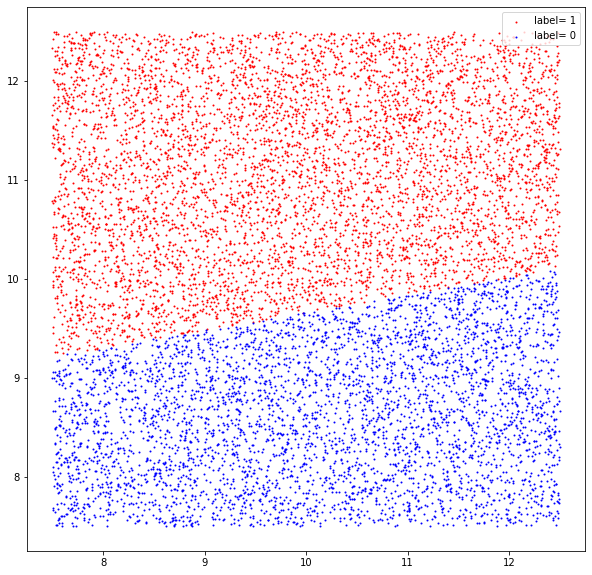

In [ ]:
## plot
plt.figure(figsize = (10,10))
plt.scatter(X_test_x1[y_pred==1], X_test_x2[y_pred==1], c='r', s=1, label="label= 1")
plt.scatter(X_test_x1[y_pred==0], X_test_x2[y_pred==0], c='b', s=1, label="label= 0")
plt.legend()


Answer these questions:

1. Explain what logistic regression is.

2. Write its formula for this problem (be specific about the dimension of the variables).

3. Learning is all about finding unknown parameters of the model to make it fit the training data. Point out the unknown parameters of your logistic regression model.


As you can probably see, your model is a big mess.
Can you guess why?

Although the model work awful, we can use it to learn about the evaluation metrics.

(_"The evaluation of binary classifiers compares two methods of assigning a binary attribute, one of which is usually a standard method and the other is being investigated. There are many metrics that can be used to measure the performance of a classifier or predictor; different fields have different preferences for specific metrics due to different goals. For example, in medicine sensitivity and specificity are often used, while in computer science precision and recall are preferred."_)[[Wiki]](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers)


Answer these questions:

1. With respect to your model, specify TP, TN, FP, and FN points. (plot them in 4 different colors)

2. Explain the following metrics (do not forget their formula!!) and report them for your model: accuracy, precision (sensitivity), recall, and specificity


3. In what kind of problems is recall more important than precision? Provide an example
<br>
4. In what kind of problems is precision more important than recall? Provide an example

In [ ]:
# 1. With respect to your model, specify TP, TN, FP, and FN points. (plot them in 4 different colors)

# label 1 = true
# label 0 = false
TN = list()
TP = list()
FN = list()
FP = list()

for point in range(len(X_test)):
  if y_pred[point] == 0 and y_test[point] == 0:
    TN.append(X_test[point].tolist())
  elif y_pred[point] == 1 and y_test[point] == 1:
    TP.append(X_test[point].tolist())
  elif y_pred[point] == 0 and y_test[point] == 1:
    FN.append(X_test[point].tolist())
  elif y_pred[point] == 1 and y_test[point] == 0:
    FP.append(X_test[point].tolist())

TN = np.array(TN)
TP = np.array(TP)
FN = np.array(FN)
FP = np.array(FP)

TN_x1 = np.array([TN.reshape(TN.shape[0] * TN.shape[1],)[i] for i in range(TN.shape[0] * TN.shape[1]) if i % 2 == 0])
TN_x2 = np.array([TN.reshape(TN.shape[0] * TN.shape[1],)[i] for i in range(TN.shape[0] * TN.shape[1]) if i % 2 == 1])

TP_x1 = np.array([TP.reshape(TP.shape[0] * TP.shape[1],)[i] for i in range(TP.shape[0] * TP.shape[1]) if i % 2 == 0])
TP_x2 = np.array([TP.reshape(TP.shape[0] * TP.shape[1],)[i] for i in range(TP.shape[0] * TP.shape[1]) if i % 2 == 1])

FN_x1 = np.array([FN.reshape(FN.shape[0] * FN.shape[1],)[i] for i in range(FN.shape[0] * FN.shape[1]) if i % 2 == 0])
FN_x2 = np.array([FN.reshape(FN.shape[0] * FN.shape[1],)[i] for i in range(FN.shape[0] * FN.shape[1]) if i % 2 == 1])

FP_x1 = np.array([FP.reshape(FP.shape[0] * FP.shape[1],)[i] for i in range(FP.shape[0] * FP.shape[1]) if i % 2 == 0])
FP_x2 = np.array([FP.reshape(FP.shape[0] * FP.shape[1],)[i] for i in range(FP.shape[0] * FP.shape[1]) if i % 2 == 1])

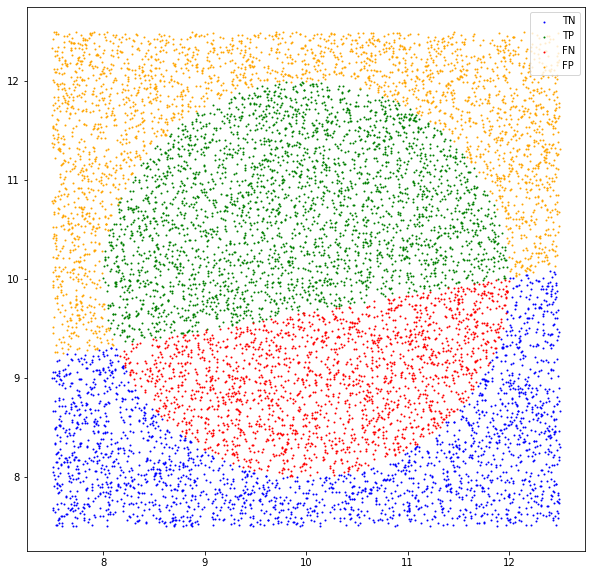

In [ ]:
## plot
plt.figure(figsize = (10,10))
plt.scatter(TN_x1, TN_x2, c='b', s=1, label="TN")
plt.scatter(TP_x1, TP_x2, c='g', s=1, label="TP")
plt.scatter(FN_x1, FN_x2, c='r', s=1, label="FN")
plt.scatter(FP_x1, FP_x2, c='orange', s=1, label="FP")

plt.legend()

[[2231 2632]
 [2021 3116]]


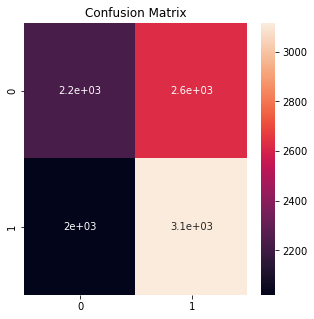

In [ ]:
#plot TP, TN, FP, FN
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred, labels=None)
print(confusion_matrix)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix")
sns.heatmap(data=confusion_matrix, annot=True)

In [ ]:
# 2. Explain the following metrics (do not forget their formula!!) and
# report them for your model: accuracy, precision (sensitivity), recall, and specificity

## calculate metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=[0, 1], target_names=None, digits=4 , zero_division='warn'))

specificity = len(TN) / (len(TN) + len(FP))
sensitivity = len(TP) / (len(TP) + len(FN))
print('Specificity: ', specificity)
print('Sensitivity: ', sensitivity)

              precision    recall  f1-score   support

           0     0.5247    0.4588    0.4895      4863
           1     0.5421    0.6066    0.5725      5137

    accuracy                         0.5347     10000
   macro avg     0.5334    0.5327    0.5310     10000
weighted avg     0.5336    0.5347    0.5322     10000

Specificity:  0.45877030639522925
Sensitivity:  0.6065797157874245


##Step 2

Now it is time to do some serious work!

To train a model that actually works, we need to use something called [Kernel](https://en.wikipedia.org/wiki/Kernel_method).
To put it simply, Kernel is a transformation that transforms input space into a feature space. By mapping the inputs to the feature space, we would have some features that are more usable for our model. In other words, sometimes our model is not that complex to extract those features by itself (e.g., linear regression), so Kernel does it for the model.

You should do:

1. Find a proper kernel for our problem (be careful! the circle was not centered at (0,0)).
2. Convert the inputs using the Kernel.
3. Feed the resulting features into the model and train it.
4. Evaluate your model on the test set (plot points with the predicted labels).
5. What is the accuracy of your model now? (Congratulation!!)


In [ ]:
## kernel

X_test_x1 = np.array([X_test.reshape(20000,)[i] for i in range(20000) if i % 2 == 0])
X_test_x2 = np.array([X_test.reshape(20000,)[i] for i in range(20000) if i % 2 == 1])

X_test_x1.shape

(10000,)

In [ ]:
## train and predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# reshape the features in order to concatenate them for splitting
# x1_reshaped = x1.reshape((20000,1))
# x2_reshaped = x2.reshape((20000,1))

# X = np.concatenate((x1_reshaped, x2_reshaped), axis=1) # X.shape = (20000, 2)
# y = label
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train_x1 = np.array([X_train.reshape(20000,)[i] for i in range(20000) if i % 2 == 0])
X_train_x2 = np.array([X_train.reshape(20000,)[i] for i in range(20000) if i % 2 == 1])

kernel_x1_train = np.square(X_train_x1 - x1_0)
kernel_x2_train = np.square(X_train_x2 - x2_0)

kernel_x1_test = np.square(X_test_x1 - x1_0)
kernel_x2_test = np.square(X_test_x2 - x2_0)

kernel_x1_train_reshaped = kernel_x1_train.reshape((10000, 1))
kernel_x2_train_reshaped = kernel_x2_train.reshape((10000, 1))

kernel_x1_test_reshaped = kernel_x1_test.reshape((10000, 1))
kernel_x2_test_reshaped = kernel_x2_test.reshape((10000, 1))

kernel_X_train = np.concatenate((kernel_x1_train_reshaped, kernel_x2_train_reshaped), axis=1) # X.shape = (20000, 2)
kernel_X_test = np.concatenate((kernel_x1_test_reshaped, kernel_x2_test_reshaped), axis=1) # X.shape = (20000, 2)

lr_model = LogisticRegression(penalty='none')
lr_model.fit(kernel_X_train, y_train)

y_pred = lr_model.predict(kernel_X_test)

print("Prediction on test set:", y_pred)

print("Accuracy on test set:", lr_model.score(kernel_X_test, y_test))



Prediction on test set: [ True False  True ... False False  True]
Accuracy on test set: 1.0


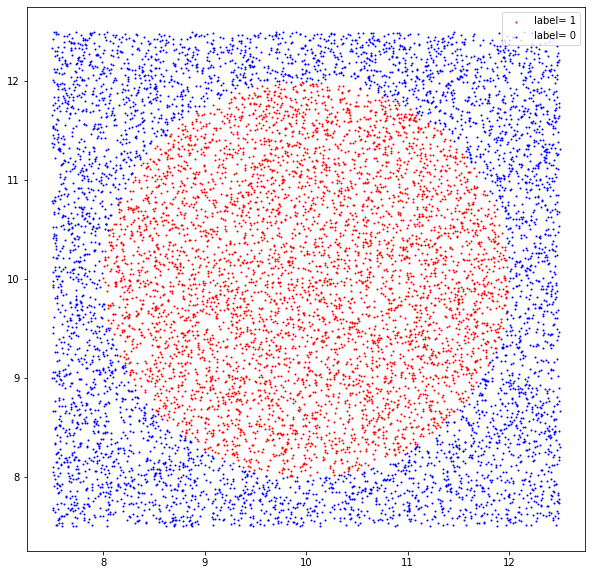

In [ ]:
## plot

plt.figure(figsize = (10,10))
plt.scatter(X_test_x1[y_pred==1], X_test_x2[y_pred==1], c='r', s=1, label="label= 1")
plt.scatter(X_test_x1[y_pred==0], X_test_x2[y_pred==0], c='b', s=1, label="label= 0")
plt.legend()

[[4863    0]
 [   0 5137]]


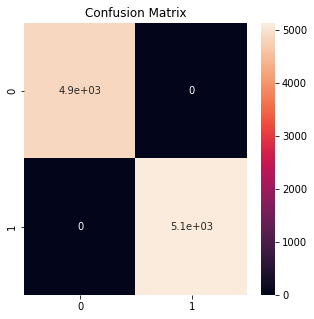

In [ ]:
## calculate accuracy
#plot TP, TN, FP, FN
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred, labels=None)
print(confusion_matrix)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix")
sns.heatmap(data=confusion_matrix, annot=True)

In [ ]:
## calculate metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=[0, 1], target_names=None, digits=4 , zero_division='warn'))

specificity = len(TN) / (len(TN) + len(FP))
sensitivity = len(TP) / (len(TP) + len(FN))
print('Specificity: ', specificity)
print('Sensitivity: ', sensitivity)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      4863
           1     1.0000    1.0000    1.0000      5137

    accuracy                         1.0000     10000
   macro avg     1.0000    1.0000    1.0000     10000
weighted avg     1.0000    1.0000    1.0000     10000

Specificity:  0.45877030639522925
Sensitivity:  0.6065797157874245


#Problem2 (Gradient Descent)
In this problem, we use the gradient descent method to solve a regression problem and also play with some amazing 3D plots!

The code below generates 600 points of the function $z = x + y^2$ and adds Gaussian noise to each point.
Your job is to find the best regression that fits these noisy points.


In [ ]:
#Do not change this block!!

def f(x, y) : return x + y**2

y = np.linspace(-6, 6, 12)
x = np.linspace(-40, 8, 50)

X, Y = np.meshgrid(x, y)
Z = f(X,Y)
Z_noise = Z + 9* np.random.randn(Z.shape[0], Z.shape[1])-2


In [ ]:
y

array([-6.        , -4.90909091, -3.81818182, -2.72727273, -1.63636364,
       -0.54545455,  0.54545455,  1.63636364,  2.72727273,  3.81818182,
        4.90909091,  6.        ])

In [ ]:
x

array([-40.        , -39.02040816, -38.04081633, -37.06122449,
       -36.08163265, -35.10204082, -34.12244898, -33.14285714,
       -32.16326531, -31.18367347, -30.20408163, -29.2244898 ,
       -28.24489796, -27.26530612, -26.28571429, -25.30612245,
       -24.32653061, -23.34693878, -22.36734694, -21.3877551 ,
       -20.40816327, -19.42857143, -18.44897959, -17.46938776,
       -16.48979592, -15.51020408, -14.53061224, -13.55102041,
       -12.57142857, -11.59183673, -10.6122449 ,  -9.63265306,
        -8.65306122,  -7.67346939,  -6.69387755,  -5.71428571,
        -4.73469388,  -3.75510204,  -2.7755102 ,  -1.79591837,
        -0.81632653,   0.16326531,   1.14285714,   2.12244898,
         3.10204082,   4.08163265,   5.06122449,   6.04081633,
         7.02040816,   8.        ])

In [ ]:
X.shape

(12, 50)

In [ ]:
Z_noise.shape

(12, 50)

In [ ]:
np.meshgrid(x, y)[0].shape # (12, 50)
np.meshgrid(x, y)[0].shape # (12, 50)

(12, 50)

In [ ]:
y

array([-6.        , -4.90909091, -3.81818182, -2.72727273, -1.63636364,
       -0.54545455,  0.54545455,  1.63636364,  2.72727273,  3.81818182,
        4.90909091,  6.        ])

In [ ]:
meshgrid_list = list()
meshgrid_ndarray_x1 = X.flatten().reshape(600, 1)
meshgrid_ndarray_x2 = Y.flatten().reshape(600, 1)

z_list = list()

# for x_i in x:
#   for y_i in y:
#     meshgrid_list.append([x_i, y_i])
#     meshgrid_list_x1.append(x_i)
#     meshgrid_list_x2.append(y_i)

i = 0
for z_noise_i in Z_noise:
  for z_i in z_noise_i:
    z_list.append(z_i)



# meshgrid_ndarray_x1 = np.array(meshgrid_list_x1).reshape(600, 1)

meshgrid_ndarray_x2_squared = np.square(meshgrid_ndarray_x2)
# meshgrid_ndarray_x2_squared = meshgrid_ndarray_x2_squared.reshape(600, 1)

meshgrid_concatenate = np.concatenate((meshgrid_ndarray_x1, meshgrid_ndarray_x2_squared), axis=1)
meshgrid_concatenate.shape

(600, 2)

In [ ]:
# meshgrid_list_x2

In [ ]:
# meshgrid_list_x1

In [ ]:
Y.flatten()

array([-6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -6.        , -6.        , -6.        , -6.        , -6.        ,
       -4.90909091, -4.90909091, -4.90909091, -4.90909091, -4.90909091,
       -4.90909091, -4.90909091, -4.90909091, -4.90909091, -4.90909091,
       -4.90909091, -4.90909091, -4.90909091, -4.90909091, -4.90909091,
       -4.90909091, -4.90909091, -4.90909091, -4.90909091, -4.90

In [ ]:
X.flatten()

array([-40.        , -39.02040816, -38.04081633, -37.06122449,
       -36.08163265, -35.10204082, -34.12244898, -33.14285714,
       -32.16326531, -31.18367347, -30.20408163, -29.2244898 ,
       -28.24489796, -27.26530612, -26.28571429, -25.30612245,
       -24.32653061, -23.34693878, -22.36734694, -21.3877551 ,
       -20.40816327, -19.42857143, -18.44897959, -17.46938776,
       -16.48979592, -15.51020408, -14.53061224, -13.55102041,
       -12.57142857, -11.59183673, -10.6122449 ,  -9.63265306,
        -8.65306122,  -7.67346939,  -6.69387755,  -5.71428571,
        -4.73469388,  -3.75510204,  -2.7755102 ,  -1.79591837,
        -0.81632653,   0.16326531,   1.14285714,   2.12244898,
         3.10204082,   4.08163265,   5.06122449,   6.04081633,
         7.02040816,   8.        , -40.        , -39.02040816,
       -38.04081633, -37.06122449, -36.08163265, -35.10204082,
       -34.12244898, -33.14285714, -32.16326531, -31.18367347,
       -30.20408163, -29.2244898 , -28.24489796, -27.26

In [ ]:
meshgrid_ndarray = np.array(meshgrid_list)
meshgrid_ndarray.shape

(0,)

In [ ]:
z_list_ndarray = np.array(z_list)


Some visualizations!!

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


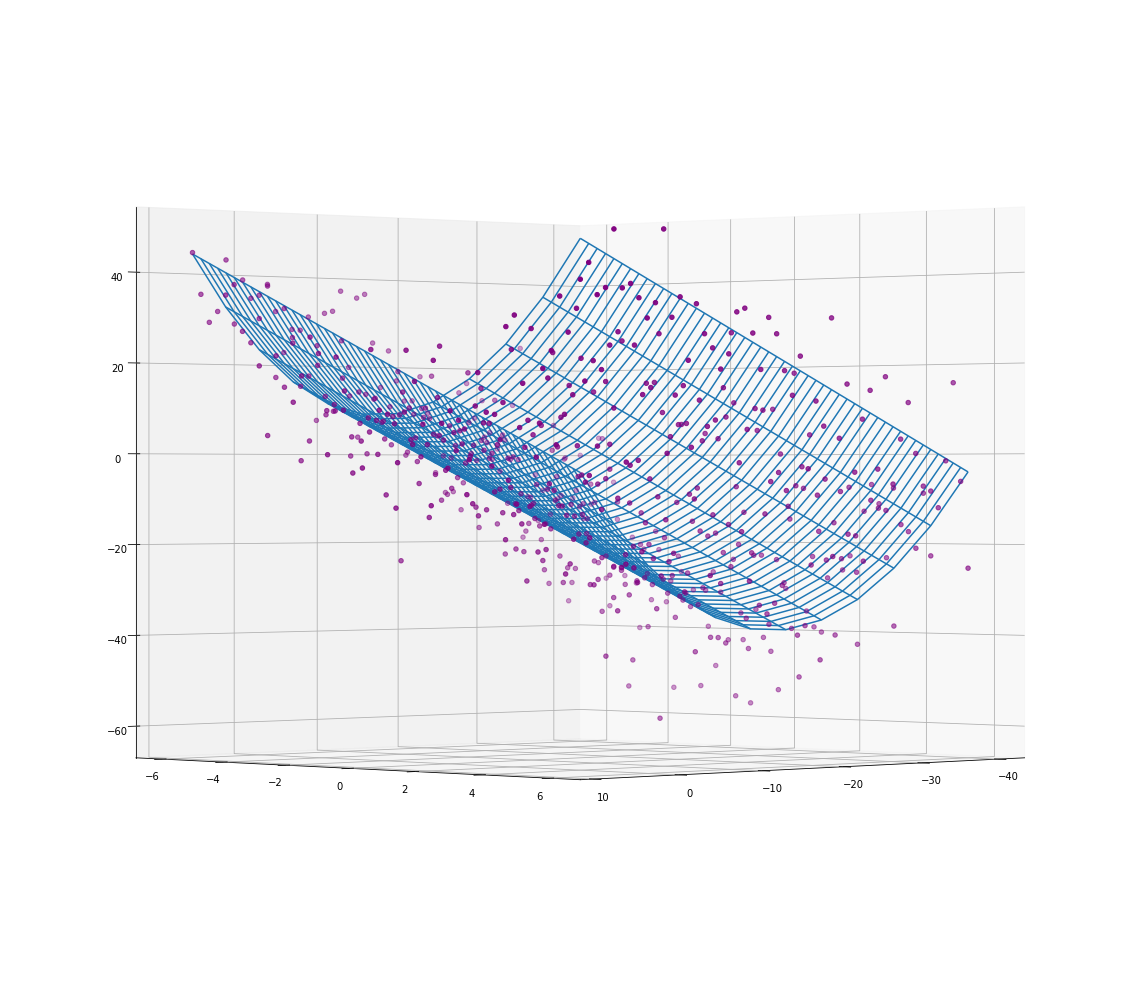

In [ ]:
# %matplotlib notebook
fig = plt.figure(figsize=(20,18))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.scatter3D(X,Y, Z_noise, c ="purple")
ax.view_init(0,45) #you can change the viewpoint (also, if you are using Jupiter, uncomment the first line, and hopefully, the plot becomes interactive!)

Click and drag around.
Enjoy!!

In [ ]:

fig = go.Figure(data=[go.Scatter3d(x=X.reshape(-1), y=Y.reshape(-1), z=Z_noise.reshape(-1),  mode='markers',
    marker=dict(
        size=2,
        colorscale='Viridis',   # choose a colorscale
    )),
     go.Surface(z=Z, x=X, y = Y, opacity=.5,)
     ])


fig.update_layout(
    autosize=False,
    width=1300,
    height=1000,
)

fig.show()

##Step1

In this step, we use the LinearRegression model of SciKit-learn to find the best regression of given data.
To the end of problem2, assume we know that the regression function is of form $y=w_2*x_2^2 + w_1*x_1$. So use only X and Y**2 as inputs.

You should do:
1. Create a LinearRegression model.
2. Prepare the inputs and train the model.
3. Find the output that your model predicts for input data, name it `predicted`
4. Use the code below to plot your estimated function and compare it with the original one.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lr_model = LinearRegression()

lr_model.fit(meshgrid_concatenate, z_list_ndarray)

predicted = lr_model.predict(meshgrid_concatenate)

# print("Prediction on test set:", y_pred)

# print("Accuracy on test set:", lr_model.score(meshgrid_ndarray, z_list_ndarray))
# # predicted = ## predict the outputs
# X_train.shape

In [ ]:
fig = go.Figure(data=[
     go.Surface(z=predicted.reshape(X.shape[0],X.shape[1]), x=X, y = Y, colorscale='Viridis',opacity=.1),
     go.Surface(z=Z, x=X, y = Y, opacity=.2,colorscale='Electric')
     ])
fig.update_layout(
    autosize=False,
    width=1300,
    height=1000,
)
fig.show()

##Step2

In this step, you need to get your hands dirty!
You are supposed to implement a gradian descent algorithm to solve linear regression.

Answer these questions:
1. Write the loss function formula for this problem.
2. Drive the derivation of the loss function.
3. Explain the impact of input normalization on the gradient descent algorithm.

You should do:
1. Using the derivation that you find, implement the `gradient_descent` function that returns the gradient and loss at the point `W`
2. Implement the gradian descent algorithm with the following considerations.

You should Consider:
1. Learning rate = 0.1
2. Repeat the algorithm for 200 iterations and save the w and loss in `all_w` and `losses` respectively after every 20 iterations.
3. the algorithm stop when $|w^{t+1} - w^t|_1 < T$
4. The start point is (0,0)
5. Do not forget to normalized the inputs ([Hint](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).

In [ ]:
import math, copy
from sklearn.preprocessing import StandardScaler

alpha = 0.1
num_iters = 200

def gradient_descent(W, x, y):
  #to do

  # number of training examples
  m = x.shape[0]
  dj_dw0 = 0
  dj_dw1 = 0

  # Computing the cost
  cost = 0
  for i in range(m):
    f_wb = (w[1] * x[i][1]**2) + (w[0] * x[i][0])
    cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

  loss = total_cost

  """
  Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw0 (scalar): The gradient of the cost w.r.t. the parameters w0
      dj_dw1 (scalar): The gradient of the cost w.r.t. the parameter w1
  """

  for i in range(m):
    f_wb = (w[1] * x[i][1]**2) + (w[0] * x[i][0])
    dj_dw0_i = (f_wb - y[i]) * (x[i][0])
    dj_dw1_i = (f_wb - y[i]) * (x[i][1]**2)
    dj_dw0 += dj_dw0_i
    dj_dw1 += dj_dw1_i
    dj_dw0 = dj_dw0 / m
    dj_dw1 = dj_dw1 / m



  gradient = np.array([dj_dw0, dj_dw1])
  # gradient = (dj_dw0, dj_dw1)


  return gradient, loss


learning_rate = 0.1
T = 1e-2
w = np.array((0, 0))
w_t_1 = np.array((0.1, 0.1))

all_w = []
losses = []


scaler = StandardScaler()

X_scaled = scaler.fit_transform(meshgrid_concatenate)


iter = 0
#to do
while iter < num_iters and not(np.linalg.norm((w - w_t_1), ord=1) < T):
  gradient, loss = gradient_descent(w, X_scaled, z_list_ndarray)
  w_t_1 = w
  iter += 1
  w = w - alpha * gradient
  if iter % 20 == 0:
    all_w.append(w)
    losses.append(loss)


print('w =', all_w)
gradient.shape

w = [array([0.19787575, 0.3522434 ]), array([0.3879632 , 0.69062276]), array([0.57056889, 1.01568376]), array([0.74598729, 1.3279506 ]), array([0.91450131, 1.62792685]), array([1.07638268, 1.91609626]), array([1.23189246, 2.19292355]), array([1.38128144, 2.45885512]), array([1.52479052, 2.71431983]), array([1.66265114, 2.95972964])]


(2,)

Use this code to see the progress of algorithm.

In [ ]:
import plotly.graph_objects as go

ww = np.array(all_w).reshape(-1,2)

w0 = np.linspace(ww[-1,0] - 8, ww[-1,0] +7, 100)
w1 = np.linspace(ww[-1,1] - 5, ww[-1,1] +4 , 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, Z_noise.reshape(-1))[1]


W0, W1 = np.meshgrid(w0,w1)




fig = go.Figure(data=[

     go.Surface(z=mse_vals, x=W0, y = W1, opacity=.5, contours = {

        "z": {"show": True, "start": 80, "end": 160, "size": 5}
    },),

    go.Scatter3d( x=ww[:,0],y=ww[:,1],
        z=np.array(losses),
        mode='lines',
        line=dict(
            color='red',
            width=2
        )),

     go.Scatter3d( x=ww[:,0],y=ww[:,1],
        z=np.array(losses),
        mode='markers',
        marker=dict(
            color='orange',

        )),

     ])

fig.update_layout(
    autosize=False,
    width=1300,
    height=1000,

)
fig.show()

#Problem3 (Regularization)



In this problem, we want to study the impact of $l_1$, and $l_2$ regularizers on overfitting.

We have a dataset consisting of 21 points that were generated using the $x^3$ function ( with added noise).


In [ ]:
#import whatever you need
import pandas as pd
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

##Step1

You should do:
1. Load the dataset from the file `data.csv`
2. Fit a polynomial regression[[Wiki]](https://en.wikipedia.org/wiki/Polynomial_regression) with $n=20$ to data.
3. Plot data, your estimated function, and the true function $x^3$ in a single plot.


In [ ]:
#load and fit data

df = pd.read_csv('/content/data.csv')
df_x = df.iloc[0, 1:]
df_y = df.iloc[1, 1:]

# ndarray
x = np.array(df_x).reshape(len(df_x), 1)
y = np.array(df_y)

# polynomial regression
degree = 20
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)

lr = lm.LinearRegression()
lr.fit(x_poly, y)
y_pred = lr.predict(x_poly)

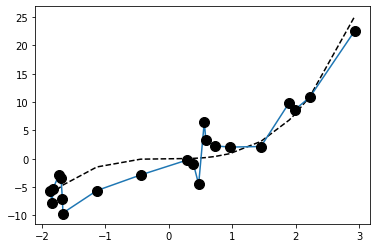

In [ ]:
#plot
plt.plot(x, x**3, '--k')
plt.plot(x, y_pred)
plt.plot(x, y, 'ok', ms=10)

Answer these questions:
1. Explain why does overfitting happen?
2. Discuss about the training error and generalization error of this model.






##step2

You should do:
1. Add $l_2$ regularizer to your model ($λ=1$).
2. Plot data, your estimated function, and the true function $x^3$ in a single plot.

In [ ]:
#model with l2
lr_ridge = lm.Ridge()
lr_ridge.fit(x_poly, y)
y_pred = lr_ridge.predict(x_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=7.73905e-20): result may not be accurate.



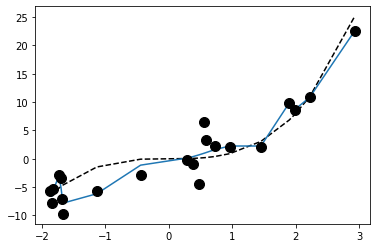

In [ ]:
#plot
plt.plot(x, x**3, '--k')
plt.plot(x, y_pred)
plt.plot(x, y, 'ok', ms=10)

##Step3

You should do:
1. Add $l_1$ regularizer to your model ($λ=1$).
2. Plot data, your estimated function, and the true function $x^3$ in a single plot.

In [ ]:
#model with l1
lr_lasso = lm.Lasso()
lr_lasso.fit(x_poly, y)
y_pred = lr_lasso.predict(x_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.528e+01, tolerance: 1.208e-01



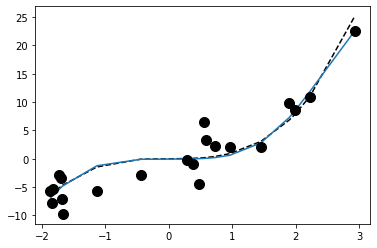

In [ ]:
#plot
plt.plot(x, x**3, '--k')
plt.plot(x, y_pred)
plt.plot(x, y, 'ok', ms=10)

##Step4

For each model, plot a histogram of the value of their parameters ($w_i$).

In [ ]:
lr.coef_

array([ 0.00000000e+00,  3.29741530e+04, -4.18290816e+04, -2.20363935e+05,
        5.61966803e+05,  2.67847478e+05, -1.58386565e+06,  9.16141434e+04,
        2.19621408e+06, -3.72138804e+05, -1.79677311e+06,  2.69590149e+05,
        9.07656360e+05, -8.57025220e+04, -2.82234749e+05,  1.19475013e+04,
        5.21472555e+04, -3.82535810e+02, -5.22347612e+03, -3.71139675e+01,
        2.17803293e+02])

In [ ]:
lr_lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.51568173e-01,
        0.00000000e+00,  2.23619121e-01, -0.00000000e+00, -1.46095717e-02,
       -1.08057246e-03, -1.84327115e-03,  2.68584016e-04, -8.29989738e-05,
        2.69996937e-05, -3.28156987e-06,  1.97525557e-06, -6.16201809e-08,
        1.33551983e-07,  4.87553544e-09,  8.82146713e-09,  8.02541011e-10,
        5.79763409e-10])

In [ ]:
lr_ridge.coef_

array([ 0.        ,  1.85842693,  1.22921155,  0.41733904,  0.58878807,
       -0.23315729, -0.08694191, -0.29167237, -0.70101968,  0.09098675,
       -1.01335874,  0.70002309, -0.43837992,  0.7268951 ,  0.89904747,
       -1.05104858, -0.19911849,  0.36022859, -0.02485688, -0.03870689,
        0.00760057])

(array([15.9801743 ,  0.        ,  0.        ,  0.        ,  0.84106181,
         0.        ,  0.        ,  0.        ,  0.        ,  0.84106181]),
 array([-0.01460957,  0.0420082 ,  0.09862598,  0.15524375,  0.21186153,
         0.2684793 ,  0.32509708,  0.38171485,  0.43833262,  0.4949504 ,
         0.55156817]),
 <a list of 10 Patch objects>)

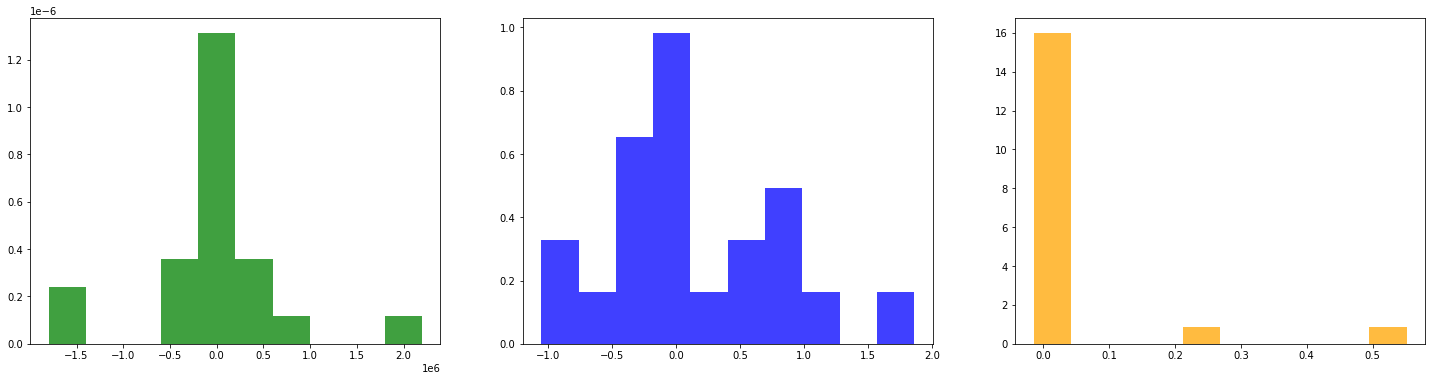

In [ ]:
##plot (you can use subplot)

plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.hist(lr.coef_, density=True, facecolor='g', alpha=0.75)

plt.subplot(1, 3, 2)
plt.hist(lr_ridge.coef_, density=True, facecolor='b', alpha=0.75)

plt.subplot(1, 3, 3)
plt.hist(lr_lasso.coef_, density=True, facecolor='orange', alpha=0.75)

# plt.ylim(0, 0.03)

Answer these questions:

1. Compare the results of models.


2. Explain the impact of each regularizer? What do they do in general?

2. Which is the best estimate of the true function $x^3$? Why?

3. Compare the histograms and discuss their differences.

4. Which regularize do you think is more robust to outlier data? Justify your answer